In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
file = "C:/excel/New_Google_dataset.csv"
df = pd.read_csv(file)

print (df.head())

              App_Name_x                                        App_Id  \
0                GROW.me                          com.horodyski.grower   
1  The Everyday Calendar                        com.mozaix.simoneboard   
2  Readymade Grocery App  com.ionicfirebaseapp.readymadegroceryuserapp   
3           Barnets Hair                       com.phorest.barnetshair   
4                GaiaZOO                       nl.haveaniceday.gaiazoo   

         Category  Rating  Rating Count Installs  Minimum Installs  \
0           Tools     0.0             0     100+               100   
1       Lifestyle     2.0            39     500+               500   
2    Food & Drink     4.2            16   1,000+              1000   
3       Lifestyle     0.0             0     100+               100   
4  Travel & Local     3.4            67  10,000+             10000   

   Maximum Installs  Free_x  Price_x  ... Currency_y Free_y DeveloperId  \
0               478    True      0.0  ...        USD   True

In [3]:
#doing some extra cleaning here
df = df.dropna(subset=['Maximum Installs', 'Rating'])

In [4]:
x = df[['Maximum Installs']]
y = df['Rating']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(x_test)


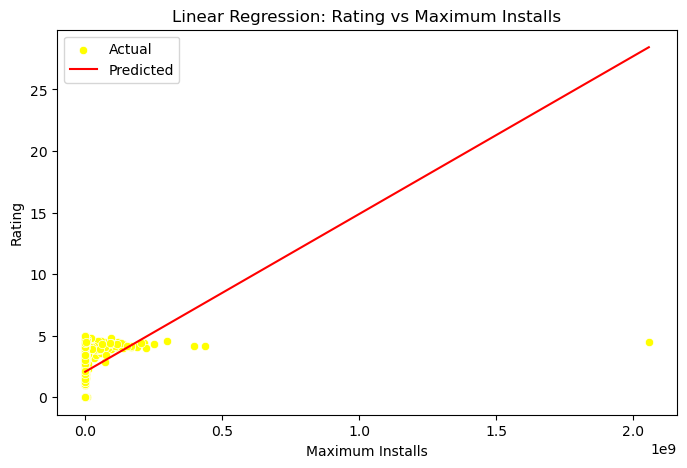

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_test['Maximum Installs'], y=y_test, label='Actual', color='yellow')
sns.lineplot(x=x_test['Maximum Installs'], y=y_pred, label='Predicted', color='red')
plt.xlabel('Maximum Installs')
plt.ylabel('Rating')
plt.title('Linear Regression: Rating vs Maximum Installs')
plt.show()

In [9]:
print(model.intercept_)
print(model.coef_)

2.0693955535805664
[1.28185317e-08]


In [10]:
model.score(x_train, y_train)

0.0027665179439344545

In [11]:
df = df.dropna(subset=['Maximum Installs', 'Rating Count', 'Price_x', 'Rating'])

In [12]:
x_multi = df[['Maximum Installs', 'Rating Count', 'Price_x']]
y_multi = df['Rating']

In [13]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

In [14]:
multi_model = LinearRegression()
multi_model.fit(x_train_m, y_train_m)

LinearRegression()

In [15]:
y_pred_m = multi_model.predict(x_test_m)

In [16]:
print("Intercept:", multi_model.intercept_)
print("Coefficients:", multi_model.coef_)


Intercept: 2.068333222345567
Coefficients: [ 1.63503314e-08 -1.60669002e-07  5.36082846e-03]


In [17]:
multi_model.score(x_train_m, y_train_m)

0.003042774601952347

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216780 entries, 0 to 216779
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   App_Name_x               216780 non-null  object 
 1   App_Id                   216780 non-null  object 
 2   Category                 216780 non-null  object 
 3   Rating                   216780 non-null  float64
 4   Rating Count             216780 non-null  int64  
 5   Installs                 216780 non-null  object 
 6   Minimum Installs         216780 non-null  int64  
 7   Maximum Installs         216780 non-null  int64  
 8   Free_x                   216780 non-null  bool   
 9   Price_x                  216780 non-null  float64
 10  Currency_x               216780 non-null  object 
 11  Size                     216780 non-null  object 
 12  Minimum Android          216780 non-null  object 
 13  Developer Id             216780 non-null  object 
 14  Deve

In [22]:
print(df['Category'].dtype)  # Check data type
print(df['Category'].isnull().sum())  # Check missing values
print(df['Category'].unique())  # Check unique values

object
0
['Tools' 'Lifestyle' 'Food & Drink' 'Travel & Local' 'Auto & Vehicles'
 'Puzzle' 'Entertainment' 'Health & Fitness' 'Medical' 'Card' 'Finance'
 'Education' 'Productivity' 'Adventure' 'News & Magazines' 'Action'
 'Business' 'Shopping' 'Books & Reference' 'Maps & Navigation'
 'Music & Audio' 'Sports' 'Casual' 'Communication' 'Arcade' 'Simulation'
 'Social' 'Photography' 'Board' 'Strategy' 'Educational' 'Racing'
 'Personalization' 'Video Players & Editors' 'Role Playing' 'Beauty'
 'Events' 'House & Home' 'Parenting' 'Casino' 'Music' 'Libraries & Demo'
 'Comics' 'Art & Design' 'Word' 'Trivia' 'Dating' 'Weather']


In [23]:
print(df['Category'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 216780 entries, 0 to 216779
Series name: Category
Non-Null Count   Dtype 
--------------   ----- 
216780 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB
None


In [24]:
categories = ['Tools', 'Lifestyle', 'Food & Drink', 'Travel & Local', 'Auto & Vehicles',
 'Puzzle', 'Entertainment', 'Health & Fitness', 'Medical', 'Card', 'Finance',
 'Education', 'Productivity', 'Adventure', 'News & Magazines', 'Action',
 'Business', 'Shopping', 'Books & Reference', 'Maps & Navigation',
 'Music & Audio', 'Sports', 'Casual', 'Communication', 'Arcade', 'Simulation',
 'Social', 'Photography', 'Board', 'Strategy', 'Educational', 'Racing',
 'Personalization', 'Video Players & Editors', 'Role Playing', 'Beauty',
 'Events', 'House & Home', 'Parenting', 'Casino', 'Music', 'Libraries & Demo',
 'Comics', 'Art & Design', 'Word', 'Trivia', 'Dating', 'Weather']
*
category_mapping = {category: idx for idx, category in enumerate(categories)}
print (category_mapping)

{'Tools': 0, 'Lifestyle': 1, 'Food & Drink': 2, 'Travel & Local': 3, 'Auto & Vehicles': 4, 'Puzzle': 5, 'Entertainment': 6, 'Health & Fitness': 7, 'Medical': 8, 'Card': 9, 'Finance': 10, 'Education': 11, 'Productivity': 12, 'Adventure': 13, 'News & Magazines': 14, 'Action': 15, 'Business': 16, 'Shopping': 17, 'Books & Reference': 18, 'Maps & Navigation': 19, 'Music & Audio': 20, 'Sports': 21, 'Casual': 22, 'Communication': 23, 'Arcade': 24, 'Simulation': 25, 'Social': 26, 'Photography': 27, 'Board': 28, 'Strategy': 29, 'Educational': 30, 'Racing': 31, 'Personalization': 32, 'Video Players & Editors': 33, 'Role Playing': 34, 'Beauty': 35, 'Events': 36, 'House & Home': 37, 'Parenting': 38, 'Casino': 39, 'Music': 40, 'Libraries & Demo': 41, 'Comics': 42, 'Art & Design': 43, 'Word': 44, 'Trivia': 45, 'Dating': 46, 'Weather': 47}


In [25]:
df['Category'] = df['Category'].map(category_mapping)

In [26]:
print(df['Category'])

0          0
1          1
2          2
3          1
4          3
          ..
216775    17
216776    17
216777    16
216778     7
216779    16
Name: Category, Length: 216780, dtype: int64


In [32]:
dev_reputation = df.groupby('DeveloperId').agg({
    'App_Id': 'count',       # Number of apps
    'Rating': 'mean',        # Average rating
    'Maximum Installs': 'sum' # Total installs
}).reset_index()

# Rename columns for clarity
dev_reputation.rename(columns={'App_Id': 'Total_Apps', 'Rating': 'Avg_Rating', 'Maximum Installs': 'Total_Installs'}, inplace=True)

# Merge back to the main DataFrame
df = df.merge(dev_reputation, on='DeveloperId', how='left')

# Normalize the reputation score (optional)
df['Developer_Reputation'] = (df['Total_Apps'] + df['Avg_Rating'] + df['Total_Installs']) / 3

In [151]:
x_multi = df[['Reviews', 'Minimum Installs']]
y_multi = df['Maximum Installs']

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)
 
multi_model = LinearRegression()
multi_model.fit(x_train_m, y_train_m)

LinearRegression()

In [152]:
y_pred_m = multi_model.predict(x_test_m)

In [153]:
print("Intercept:", multi_model.intercept_)
print("Coefficients:", multi_model.coef_)


Intercept: 47687.5896814625
Coefficients: [2.88761531 1.57402224]


In [154]:
multi_model.score(x_train_m, y_train_m)

0.9051603176648235

In [155]:
df['Reviews'].head

<bound method NDFrame.head of 0         0
1         2
2         0
3         0
4         0
         ..
216775    1
216776    0
216777    3
216778    1
216779    0
Name: Reviews, Length: 216780, dtype: int64>

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred_m = multi_model.predict(x_test_m) # Assuming 'model' is your trained regression model

# Compute metrics
mae = mean_absolute_error(y_test_m, y_pred_m)
mse = mean_squared_error(y_test_m, y_pred_m)
rmse = np.sqrt(mse)  # Square root of MSE
r2 = r2_score(y_test_m, y_pred_m)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 173065.02
Mean Squared Error (MSE): 10671363434451.21
Root Mean Squared Error (RMSE): 3266705.29
R² Score: 0.92
